# Ford Gobike EDA


## Investigation Overview

In this investigation, I wanted to look at the specifications of trips that have a correlation with it. The main focus was on: member age, user type and duration.

## Dataset Overview

There are 183412 fordgobike trips in the dataset with 16 specifications (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude ,end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip). Out of 16 specifications 9 are numerical, 2 are datetime and 5 are object type.


In [1]:
# importing the libraries I need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
base_color = sb.color_palette()[0]

In [2]:
# load in the dataset into a pandas dataframe
bikes = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
# Extractings the Top 10 Start Stations. 
bikes['start_station_name'].value_counts()[0:10]

Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
San Francisco Ferry Building (Harry Bridges Plaza)           2710
San Francisco Caltrain (Townsend St at 4th St)               2703
Powell St BART Station (Market St at 5th St)                 2327
Howard St at Beale St                                        2293
Steuart St at Market St                                      2283
Name: start_station_name, dtype: int64

In [4]:
# Extractings the Top 10 Start Stations. 
locs = ['Market St at 10th St',                                         
        'San Francisco Caltrain Station 2  (Townsend St at 4th St)',    
        'Berry St at 4th St',                                          
        'Montgomery St BART Station (Market St at 2nd St)',             
        'Powell St BART Station (Market St at 4th St)',                 
        'San Francisco Ferry Building (Harry Bridges Plaza)',           
        'San Francisco Caltrain (Townsend St at 4th St)',               
        'Powell St BART Station (Market St at 5th St)',                 
        'Howard St at Beale St',                                       
        'Steuart St at Market St'] 

bikesStartTop10 = bikes.loc[bikes['start_station_name'].isin(locs)]
bikesStartTop10_counts = bikesStartTop10['start_station_name'].value_counts()
bikesStartTop10_Order = bikesStartTop10_counts.index

In [5]:
# Extractings the Top 10 End Stations. 
bikes['end_station_name'].value_counts()[0:10]

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4857
Market St at 10th St                                         3973
Montgomery St BART Station (Market St at 2nd St)             3647
San Francisco Ferry Building (Harry Bridges Plaza)           3368
Powell St BART Station (Market St at 4th St)                 2997
San Francisco Caltrain (Townsend St at 4th St)               2947
Berry St at 4th St                                           2872
The Embarcadero at Sansome St                                2512
Powell St BART Station (Market St at 5th St)                 2353
Steuart St at Market St                                      2338
Name: end_station_name, dtype: int64

In [6]:
# Extractings the Top 10 End Stations. 
locs = ['San Francisco Caltrain Station 2  (Townsend St at 4th St)',    
        'Market St at 10th St',                                         
        'Montgomery St BART Station (Market St at 2nd St)',            
        'San Francisco Ferry Building (Harry Bridges Plaza)',          
        'Powell St BART Station (Market St at 4th St)',              
        'San Francisco Caltrain (Townsend St at 4th St)',             
        'Berry St at 4th St',                                          
        'The Embarcadero at Sansome St',                                
        'Powell St BART Station (Market St at 5th St)',                
        'Steuart St at Market St'] 

bikesEndTop10 = bikes.loc[bikes['end_station_name'].isin(locs)]
bikesEndTop10_counts = bikesEndTop10['end_station_name'].value_counts()
bikesEndTop10_Order = bikesEndTop10_counts.index

# Top 10 Start and End Stations
We can see the top Start and End stations that is favorite for our users.

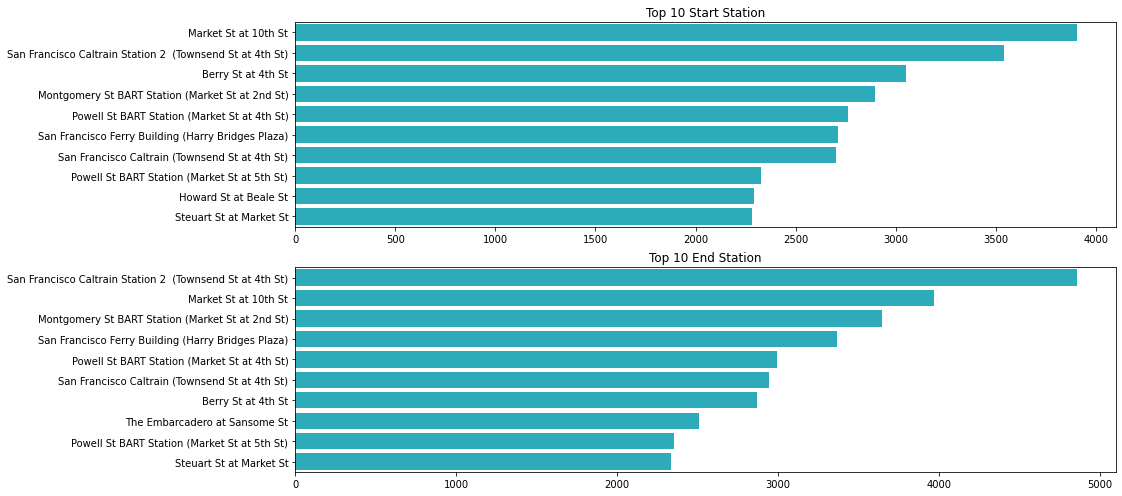

In [7]:
plt.figure(figsize=[14.70, 8.27])
plt.subplot(2,1,1)
sb.countplot(data = bikesStartTop10 , y='start_station_name',order=bikesStartTop10_Order,color='tab:cyan')
plt.title('Top 10 Start Station')
plt.xlabel('')
plt.ylabel('');
plt.subplot(2,1,2)
sb.countplot(data = bikesEndTop10, y = 'end_station_name', color='tab:cyan', order = bikesEndTop10_Order)
plt.title('Top 10 End Station')
plt.xlabel('')
plt.ylabel('');

# Dominant Gender & Dominant User Type
From these plots, we can determine that males are the dominant gender by the percentage of 74.6% and the dominant user type is the subscribers by the percentage of 89.2%.

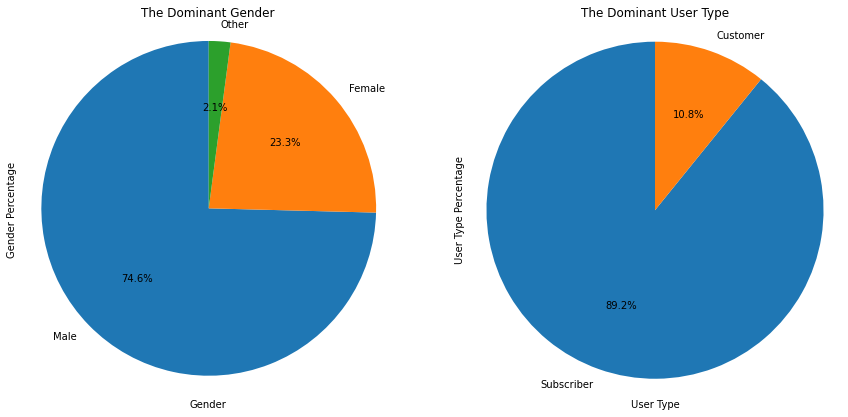

In [8]:
plt.figure(figsize=[14.70, 8.27])
plt.subplot(1,2,1)
sorted_gender = bikes['member_gender'].value_counts()
plt.pie(sorted_gender, labels=sorted_gender.index, startangle = 90, autopct = '%1.1f%%')
plt.title('The Dominant Gender')
plt.axis('square');
plt.xlabel('Gender')
plt.ylabel('Gender Percentage');

plt.subplot(1,2,2)
sorted_type = bikes['user_type'].value_counts()
plt.pie(sorted_type, labels = sorted_type.index, startangle = 90, autopct = '%1.1f%%')
plt.title('The Dominant User Type')
plt.axis('square');
plt.xlabel('User Type')
plt.ylabel('User Type Percentage');

# Gender vs. User Type
From this plot, we can determine the number of each gender in each user type and the ratio

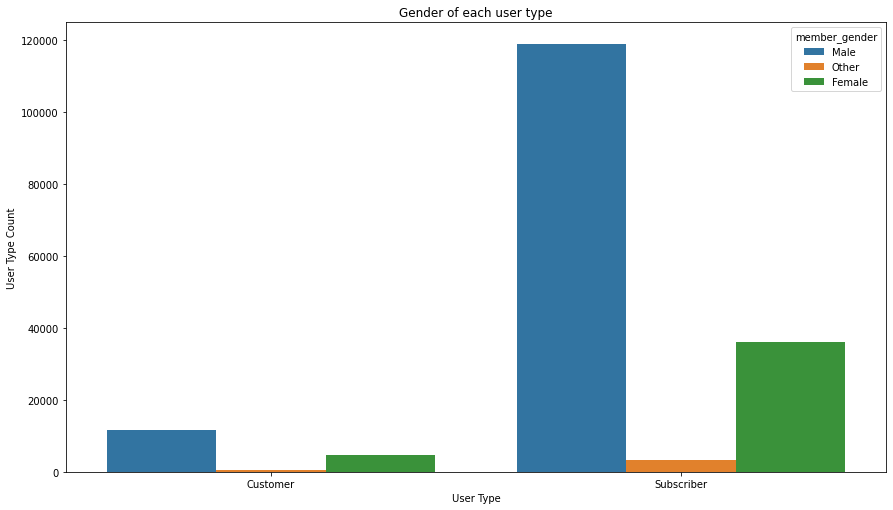

In [9]:
plt.figure(figsize=[14.70, 8.27])
sb.countplot(data=bikes,x='user_type',hue='member_gender');
plt.title('Gender of each user type')
plt.xlabel('User Type')
plt.ylabel('User Type Count');

In [10]:
# make sure for the last figure
print("Females ratio of customer user type is:",'{:0.1f}%'.format((4647/19868)*100))
print("Females ratio of Subscriber user type is:",'{:0.1f}%'.format((36197/163544)*100))
print("Males ratio of customer user type is:",'{:0.1f}%'.format(((19868-4647)/19868)*100))
print("Males ratio of Subscriber user type is:",'{:0.1f}%'.format(((163544-36197)/163544)*100))

Females ratio of customer user type is: 23.4%
Females ratio of Subscriber user type is: 22.1%
Males ratio of customer user type is: 76.6%
Males ratio of Subscriber user type is: 77.9%


### Females ratio of customer user type is: 23.4%
### Females ratio of Subscriber user type is: 22.1%
### Males ratio of customer user type is: 76.6%
### Males ratio of Subscriber user type is: 77.9%

In [11]:
# Extracting the ages from the birth year.
bikes.dropna(inplace=True)

year = []
for i in bikes['member_birth_year']:
    year.append(2021 - i)
    
bikes['age'] = year
bikes['age'].value_counts()

33.0     10214
28.0      9323
32.0      8967
31.0      8640
30.0      8484
         ...  
143.0        1
93.0         1
91.0         1
111.0        1
94.0         1
Name: age, Length: 75, dtype: int64

In [12]:
# remove the outlires (ages above 100)
bikes.drop(bikes[bikes['age'] > 100].index, inplace = True)

# Distribution of Duration
**most of the trips is between 170sec(3 minutes) to 1550sec(25 minutes) and they centered around 600sec(10 minutes)** 

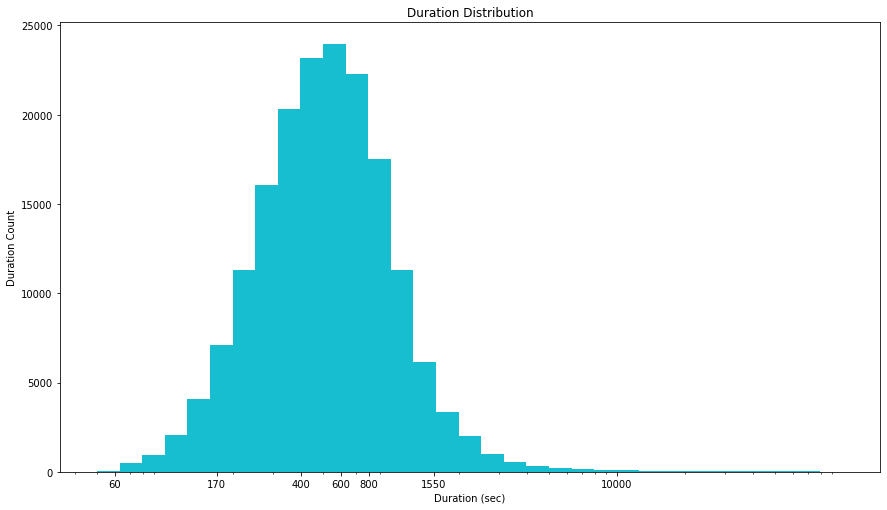

In [13]:
# plotting the distribution of duration with the log scale.
plt.figure(figsize=[14.70, 8.27])

bins = 10 ** np.arange(1.7, np.log10(bikes['duration_sec'].max())+0.1, 0.1)

plt.hist(data = bikes, x = 'duration_sec', bins = bins,color='tab:cyan')

plt.xscale('log')
plt.xticks([60,170,400,600,800,1550,10000], [60,170,400,600,800,1550,10000])
plt.xlabel('Duration (sec)')
plt.ylabel('Duration Count')
plt.title('Duration Distribution');

# Distribution of Age
From these plots, we can determine the most age range is between 20 and 50 and the most one is around 30 and 40.

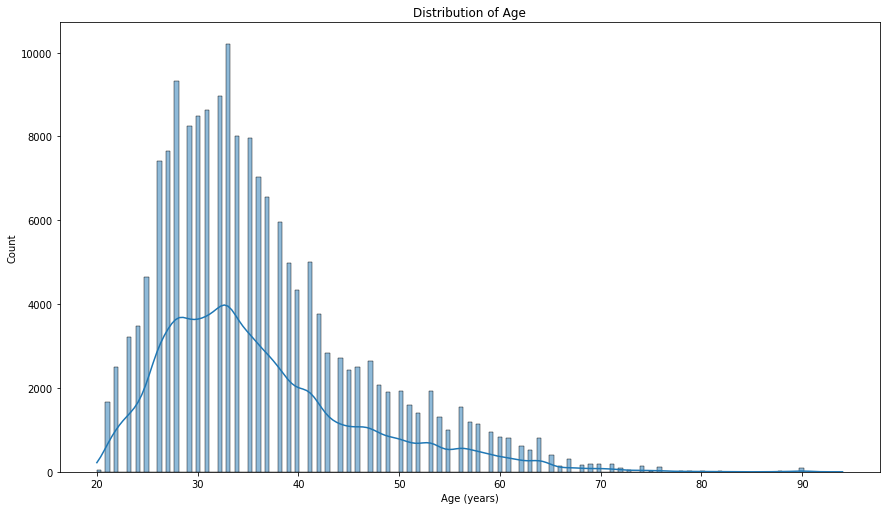

In [14]:
# plotting the distribution of age.
plt.figure(figsize=[14.70, 8.27])
base_color = sb.color_palette()[0]
sb.histplot(data = bikes, x = 'age', color = base_color, kde=True);
plt.title('Distribution of Age')
plt.xlabel('Age (years)')
plt.show()

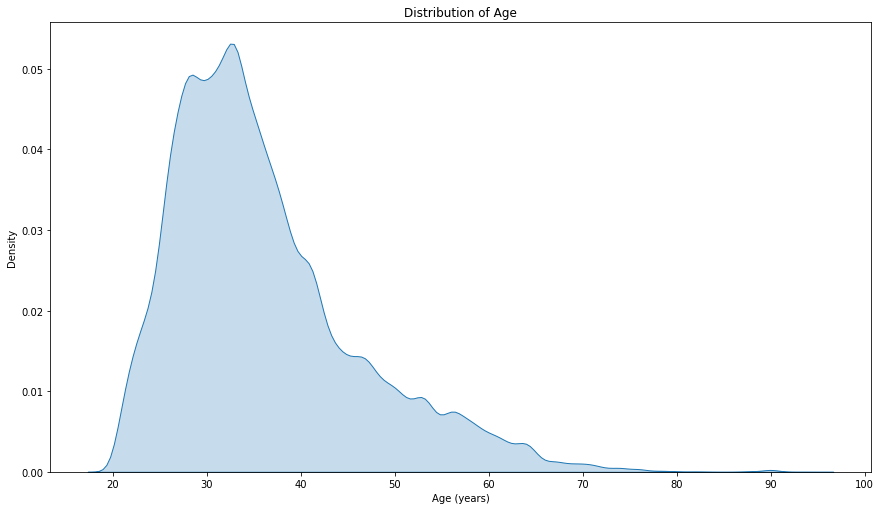

In [15]:
# plotting the distribution of age for all genders.
plt.figure(figsize=[14.70, 8.27])
sb.kdeplot(bikes['age'], shade=True)
plt.title('Distribution of Age')
plt.xlabel('Age (years)')
plt.show()

# Duration vs. Age
From these plots, we can determine the correlation between the age and duration as it a relatively stable relationship, then a slight negative relationship, and then strengthened with age, so the duration decreases.

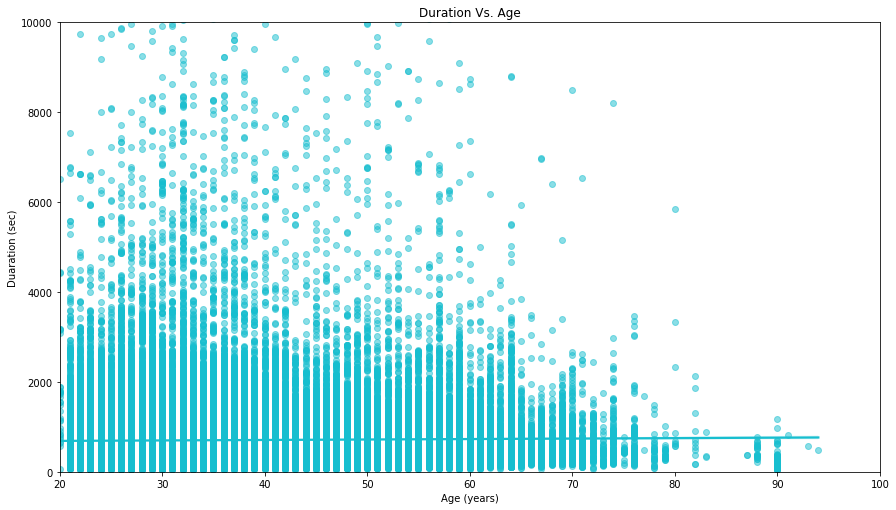

In [16]:
plt.figure(figsize=[14.70, 8.27])
sb.regplot(data=bikes,x = 'age',y = 'duration_sec',scatter_kws = {'alpha':0.5},color='tab:cyan')
plt.axis([20, 100, 0, 10000 ])
plt.xlabel('Age (years)')
plt.ylabel('Duaration (sec)')
plt.title('Duration Vs. Age');

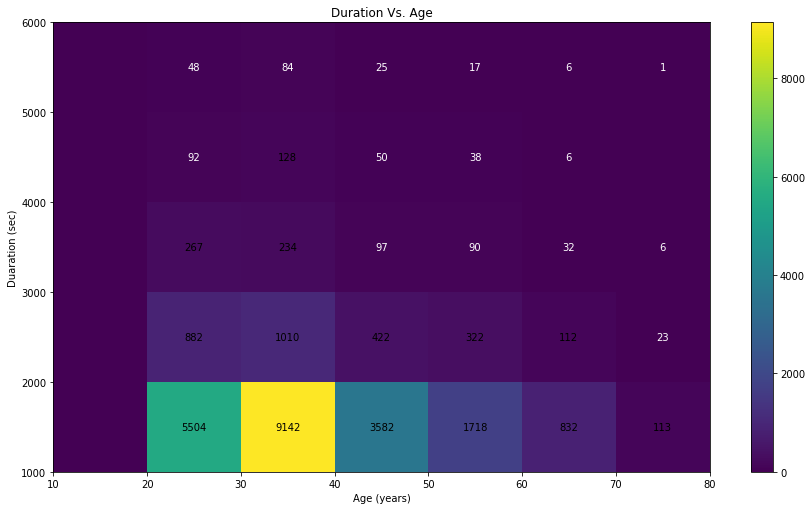

In [17]:
plt.figure(figsize=[14.70, 8.27])
bins_x = np.arange(10, 90, 10)
binwidth_x = 10
bins_y = np.arange(1000, 7000, 1000)
binwidth_y = 1000
plot = plt.hist2d((bikes['age']), bikes['duration_sec'], bins = [bins_x,bins_y])
plt.colorbar()
plt.xlabel('Age (years)')
plt.ylabel('Duaration (sec)')
plt.title('Duration Vs. Age')

counts = plot[0]
for i in range(counts.shape[0]):
    for j in range(counts.shape[1]):
        c = counts[i,j]
        if c >= 100: # increase visibility on darker cells
            plt.text(bins_x[i]+(0.5*binwidth_x), bins_y[j]+(0.5*binwidth_y), int(c),
                     ha = 'center', va = 'center', color = 'black')
        elif c > 0:
            plt.text(bins_x[i]+(0.5*binwidth_x), bins_y[j]+(0.5*binwidth_y), int(c),
                     ha="center", va="center", color = 'white')
plt.show();

# The Surprise!
## Gender Vs. Age
We can see that the density of ages for females hit the higher values and comes after females the male's one then the other gender and noticed that the other gender age density is jumped again in range 50 to 60 years old which it is a surprise!.

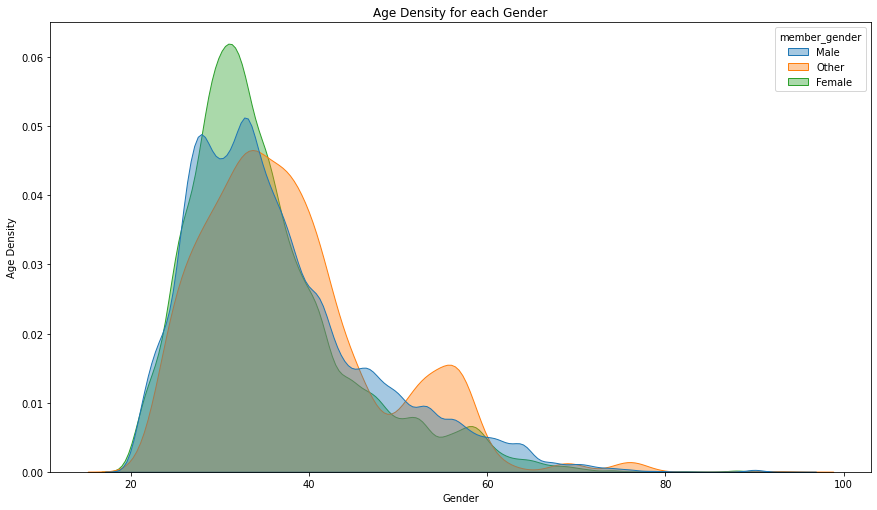

In [18]:
# plotting the density of age for each genders alone.
plt.figure(figsize=[14.70, 8.27])
sb.kdeplot(data=bikes, x="age", hue="member_gender", fill=True, common_norm=False, alpha=0.4)
plt.title('Age Density for each Gender')
plt.xlabel('Gender')
plt.ylabel('Age Density');

In [19]:
bikes['age'] = bikes['age'].apply(lambda x: (x//10)*10)
bikes['age'].unique() 

array([30., 40., 60., 20., 50., 70., 80., 90.])

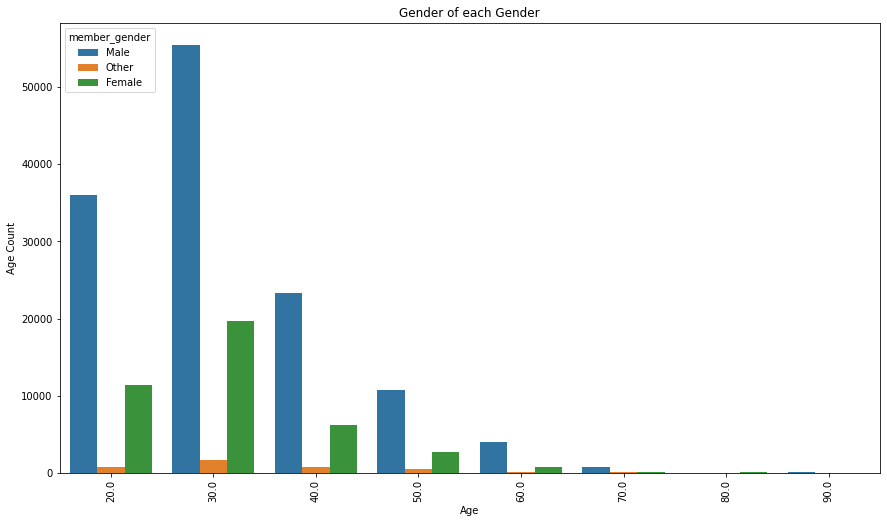

In [20]:
plt.figure(figsize=[14.70, 8.27])
sb.countplot(data=bikes,x='age',hue='member_gender');
plt.xticks(rotation=90)
plt.title('Gender of each Gender')
plt.xlabel('Age')
plt.ylabel('Age Count');

**Males dominate in all age groups and we can see that around the age of thirty is the highest one between all genders.**

# Duration vs Gender
we can see that the female's median duration is higher than the males and have the longer trip than males although the number of males is more, and the other gender has the longest trips.

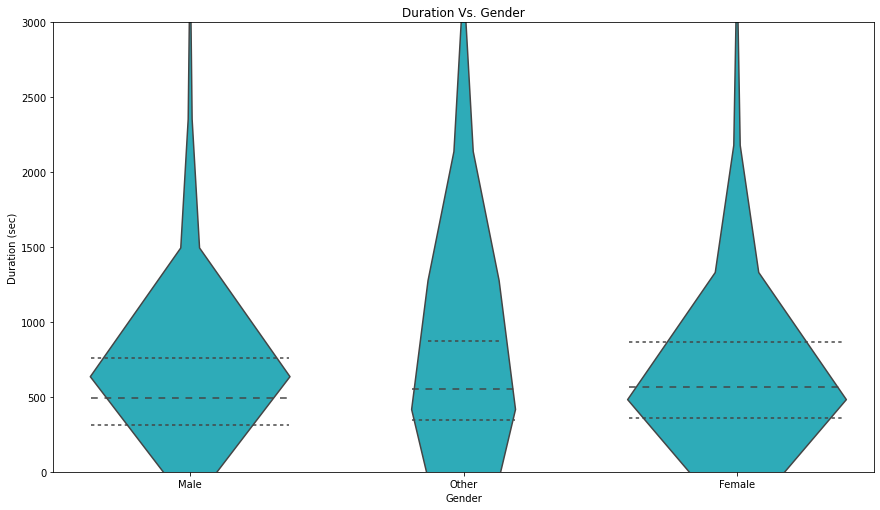

In [21]:
plt.figure(figsize=[14.70, 8.27])
sb.violinplot(data = bikes, x = 'member_gender', y = 'duration_sec',inner='quartile',color='tab:cyan')
plt.ylim([0, 3000])
plt.xlabel('Gender')
plt.ylabel('Duration (sec)')
plt.title('Duration Vs. Gender');
plt.show();

# Duration vs. User Type
We can see from this plot that the Customer has a longer trip duration than the subscriber.

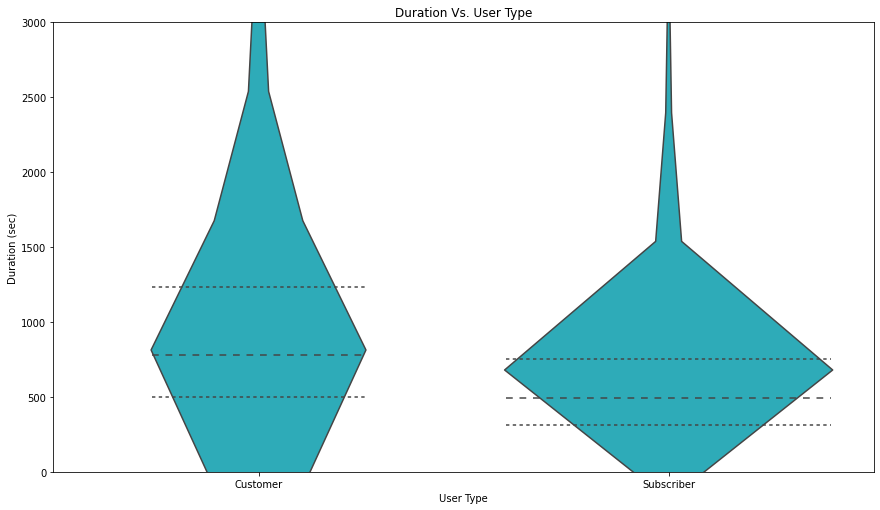

In [22]:
plt.figure(figsize=[14.70, 8.27])
sb.violinplot(data = bikes, x = 'user_type', y = 'duration_sec',inner='quartile',color='tab:cyan')
plt.ylim([0, 3000])
plt.xlabel('User Type')
plt.ylabel('Duration (sec)')
plt.title('Duration Vs. User Type')
plt.show();

### Duration vs. Age to each Gender
It is obvious that the 20 to 40 age range is dominant for all genders in all duration levels and also we noticed that the males have the highest trip durations and females come after, and finally the other gender.

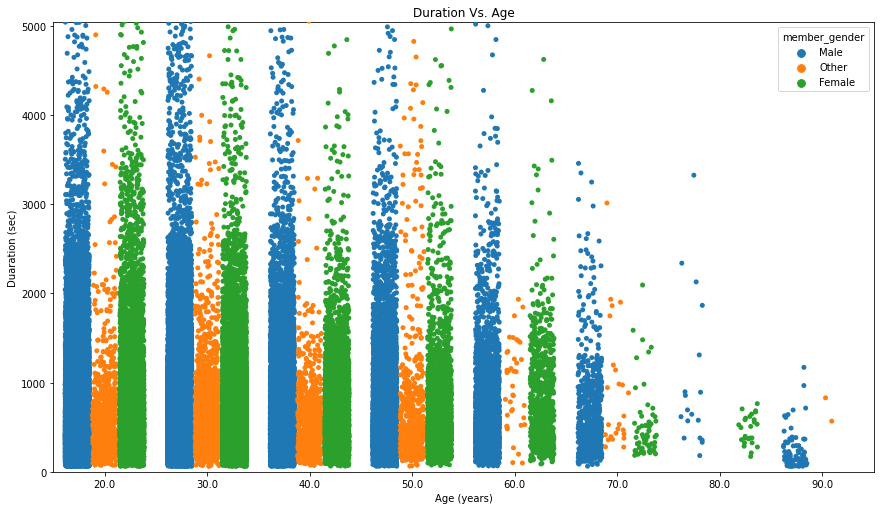

In [23]:
plt.figure(figsize=[14.70, 8.27])
sb.stripplot(data = bikes, x = 'age', y = 'duration_sec',
              hue = 'member_gender',order = sorted(bikes['age'].unique()),
             jitter=0.35,dodge=True)
plt.xlabel('Age (years)')
plt.ylabel('Duaration (sec)')
plt.title('Duration Vs. Age')
plt.ylim(0,bikes.duration_sec.quantile(0.995))
plt.show();

# Duration vs. Age for each User Type
We can see from these plots that there is slight tilt to higher age with high trip duration for subscribers.

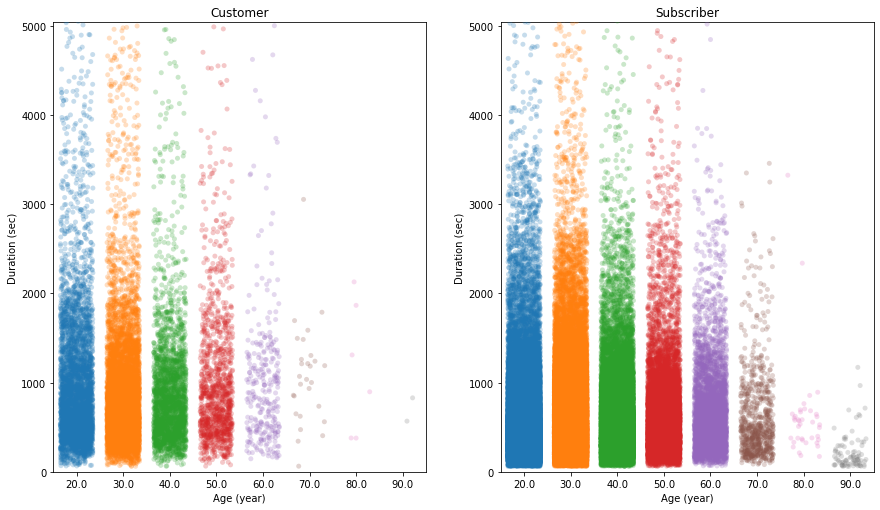

In [24]:
plt.figure(figsize=[14.70, 8.27])
plt.subplot(1,2,1)
bikesUserType = bikes[bikes['user_type'] == 'Customer']
sb.stripplot(data = bikesUserType,x='age', y='duration_sec', alpha=0.25,order = sorted(bikes['age'].unique()),
             jitter=0.35,dodge=True)
#plt.axis([20, 80, 0, 10000 ])
plt.ylim(0,bikes.duration_sec.quantile(0.995))
plt.xlabel('Age (year)')
plt.ylabel('Duration (sec)')
plt.title('Customer')
plt.subplot(1,2,2)
bikesUserType = bikes[bikes['user_type'] == 'Subscriber']
sb.stripplot(data = bikesUserType,x='age', y='duration_sec', alpha=0.25,order = sorted(bikes['age'].unique()),
             jitter=0.35,dodge=True)
#plt.axis([20, 80, 0, 10000 ])
plt.ylim(0,bikes.duration_sec.quantile(0.995))
plt.xlabel('Age (year)')
plt.ylabel('Duration (sec)')
plt.title('Subscriber')
plt.show();

In [ ]:
!jupyter nbconvert VizProject-Investagtion.ipynb --to slides --no-input